# Comparing trends Daniel

In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

words_to_concat = ['act.csv', 'BUY AND HOLD.csv', 'DOW JONES.csv']

def concat_words_from_path(path_list, words):
    out_df = []
    for word in words:
        ospath = os.path.join(path_list[0], path_list[1], word)
        df = pd.read_csv(ospath)
        df = df.set_index('date')
        try:
            del df['google']
        except:
            pass
        try:
            del df['isPartial']
        except:
            pass
        out_df.append(df)
    
    return out_df

In [46]:
google_ref_df = pd.concat(concat_words_from_path(path_list=['data', 'daily_trend'], words=words_to_concat), axis=1)
google_ref_normalized_df = pd.concat(concat_words_from_path(path_list=['data', 'daily_trend_normalized'], words=words_to_concat), axis=1)

words_to_concat = ['act_us.csv', 'BUY AND HOLD_us.csv', 'DOW JONES_us.csv']
us_ref_normalized_df = pd.concat(concat_words_from_path(path_list=['data', 'daily_trend_normalized'], words=words_to_concat), axis=1)
us_ref_df = pd.concat(concat_words_from_path(path_list=['data', 'daily_trend'], words=words_to_concat), axis=1)

In [50]:
us_ref_normalized_df

,act,BUY AND HOLD,DOW JONES
date,,,
2004-01-01,0.000000,0.0,0.000000
2004-01-02,0.000000,0.0,0.000000
2004-01-03,0.000000,0.0,0.000000
2004-01-04,0.000000,0.0,0.000000
2004-01-05,0.000000,0.0,0.000000
...,...,...,...
2020-07-24,0.253022,0.0,0.229508
2020-07-25,0.214095,0.0,0.049180
2020-07-26,0.214095,0.0,0.016393


## 1) Word = `DOW JONES`

### mean vs normalized | Timeframe = "2019-10-01 2020-03-01" | REF='google'

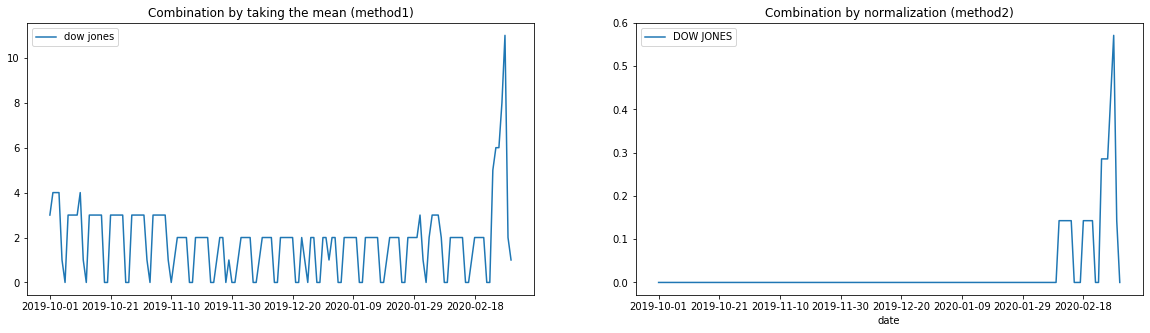

In [44]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
google_ref_df.loc['2019-10-01':'2020-03-01'][['dow jones']].plot(ax=ax[0]);
ax[0].set_title("Combination by taking the mean (method1)");
google_ref_normalized_df.loc['2019-10-01':'2020-03-01'][['DOW JONES']].plot(ax=ax[1]);
ax[1].set_title("Combination by normalization (method2)");

### mean vs normalized | Timeframe = "2019-10-01 2020-03-01" | REF='US'

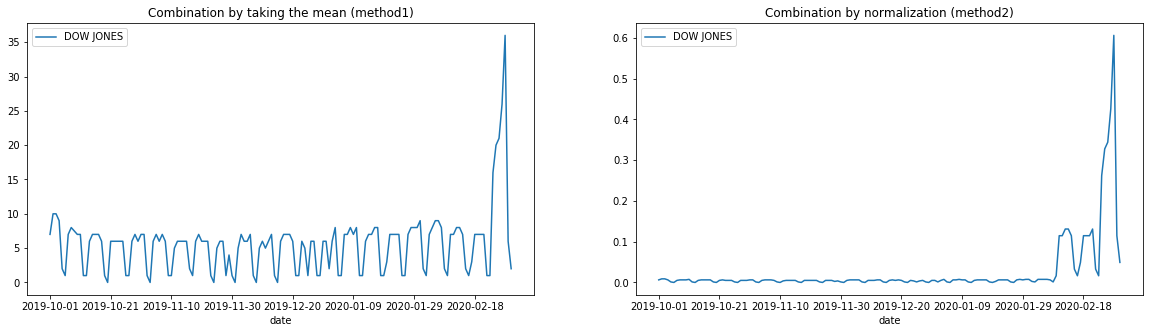

In [51]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
us_ref_df.loc['2019-10-01':'2020-03-01'][['DOW JONES']].plot(ax=ax[0]);
ax[0].set_title("Combination by taking the mean (method1)");
us_ref_normalized_df.loc['2019-10-01':'2020-03-01'][['DOW JONES']].plot(ax=ax[1]);
ax[1].set_title("Combination by normalization (method2)");

In [ ]:
REFWORD = "google"
SLEEPTIME = 20
TIMEZONE_OFFSET = 360
HOST_LANGUAGE = 'en-US'
COUNTRY_ABBREVIATION = 'US'
FREQ_TO_DOWNLOAD = 'daily'
kw = word
timeframe = "{} {}".format(timeframe_1, timeframe_2)


trends = TrendReq(hl=HOST_LANGUAGE, tz=TIMEZONE_OFFSET)
trends.build_payload(kw_list=[kw, REFWORD],
                     geo=COUNTRY_ABBREVIATION,
                     timeframe=timeframe)
df = trends.interest_over_time()

df = df[word] / 100
df.name = word
df = df.to_frame()
display(Markdown("### Data obtained from the API"))
df.plot();

## 2) Word = `act`


### mean vs normalized | Timeframe = "2019-10-01 2020-03-01" | REF='google'

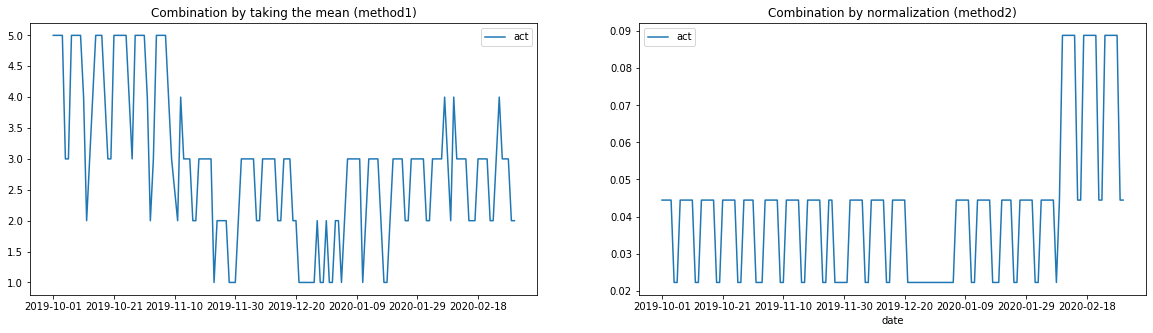

In [56]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
google_ref_df.loc['2019-10-01':'2020-03-01'][['act']].plot(ax=ax[0]);
ax[0].set_title("Combination by taking the mean (method1)");
google_ref_normalized_df.loc['2019-10-01':'2020-03-01'][['act']].plot(ax=ax[1]);
ax[1].set_title("Combination by normalization (method2)");

### mean vs normalized | Timeframe = "2019-10-01 2020-03-01" | REF='US'

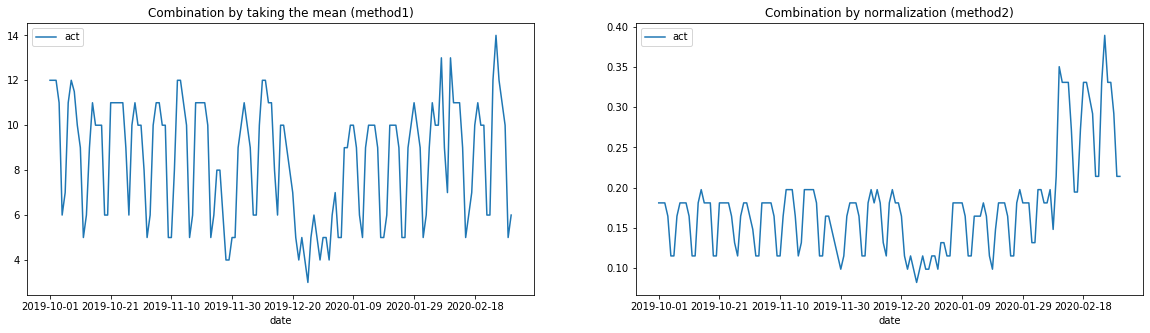

In [58]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
us_ref_df.loc['2019-10-01':'2020-03-01'][['act']].plot(ax=ax[0]);
ax[0].set_title("Combination by taking the mean (method1)");
us_ref_normalized_df.loc['2019-10-01':'2020-03-01'][['act']].plot(ax=ax[1]);
ax[1].set_title("Combination by normalization (method2)");